In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
users=pd.read_csv('takehome_users.csv', encoding='latin-1')
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [59]:
users.isna().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [63]:
users.last_session_creation_time=pd.to_datetime(users.last_session_creation_time, unit='s')

In [66]:
users.last_session_creation_time

0       2014-04-22 03:53:30
1       2014-03-31 03:45:04
2       2013-03-19 23:14:52
3       2013-05-22 08:09:28
4       2013-01-22 10:14:20
                ...        
11995   2013-09-06 06:14:15
11996   2013-01-15 18:28:37
11997   2014-04-27 12:45:16
11998   2012-06-02 11:55:59
11999   2014-01-26 08:57:12
Name: last_session_creation_time, Length: 12000, dtype: datetime64[ns]

In [67]:
users=users[~users.last_session_creation_time.isna()]

In [68]:
users.dtypes

object_id                              int64
creation_time                         object
name                                  object
email                                 object
creation_source                       object
last_session_creation_time    datetime64[ns]
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                   float64
dtype: object

In [72]:
users.creation_time=users.creation_time.astype('datetime64[ns]')
users['usage_time']=users.last_session_creation_time-users.creation_time

In [73]:
users.usage_time.head()

0     0 days
1   136 days
2     0 days
3     1 days
4     5 days
Name: usage_time, dtype: timedelta64[ns]

In [78]:
users[(users.usage_time=='0D')&(users.email.duplicated())]

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,usage_time
4955,4956,2013-01-28 23:21:34,Mueller Klaus,KlausMueller@gustr.com,GUEST_INVITE,2013-01-28 23:21:34,1,0,19,3225.0,0 days
6705,6706,2012-06-27 06:19:12,Gerste Ulrike,UlrikeGerste@gmail.com,SIGNUP_GOOGLE_AUTH,2012-06-27 06:19:12,0,1,333,NaN,0 days
7603,7604,2014-03-06 20:34:32,Seiler Marko,MarkoSeiler@yahoo.com,SIGNUP,2014-03-06 20:34:32,0,0,258,NaN,0 days
11244,11245,2014-01-17 18:05:15,Neudorf Kerstin,KerstinNeudorf@gmail.com,SIGNUP,2014-01-17 18:05:15,1,1,68,NaN,0 days


In [80]:
users.email.duplicated().sum()

13

In [81]:
users=users[~users.email.duplicated()]

In [82]:
users.invited_by_user_id.isna().sum()

4039

In [83]:
users.invited_by_user_id.isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
11995    False
11996     True
11997    False
11998     True
11999     True
Name: invited_by_user_id, Length: 8810, dtype: bool

In [84]:
users['invited_by_user']=users.invited_by_user_id.apply(lambda x: 0 if pd.isna(x) else 1)

In [85]:
users.describe()

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,usage_time,invited_by_user
count,8810.000000,8810.000000,8810.000000,8810.000000,4771.000000,8810,8810.000000
mean,6017.930306,0.252100,0.151759,142.497843,5982.272899,59 days 07:11:10.964812713,0.541544
std,3464.891278,0.434243,0.358808,124.180053,3393.114550,144 days 06:19:26.708544454,0.498299
min,1.000000,0.000000,0.000000,0.000000,3.000000,0 days 00:00:00,0.000000
25%,3014.250000,0.000000,0.000000,30.000000,3074.000000,0 days 00:00:00,0.000000
50%,6032.500000,0.000000,0.000000,109.000000,5952.000000,1 days 00:00:00,1.000000
75%,9028.250000,1.000000,0.000000,239.000000,8857.500000,20 days 00:00:00,1.000000
max,12000.000000,1.000000,1.000000,416.000000,11999.000000,729 days 00:00:00,1.000000


Object ID starts from 1 and invited_by_user starts from 3, so we can fill in null invited_by_user_id with 0, meaning the corresponding the user was not invited by anyone else in the database.

In [88]:
users.invited_by_user_id.fillna(0, inplace=True)

In [89]:
users.invited_by_user_id=users.invited_by_user_id.astype(int)

In [90]:
users.invited_by_user_id.value_counts().index

Int64Index([    0,  4612, 11770,  2308,  3721,  4302,  3261, 10741,  6706,
             2354,
            ...
            10823,  5521,  2156,  1458,  6110,  6455,  3689,  1255,  6420,
             5093],
           dtype='int64', length=2228)

In [91]:
users.invited_by_user_id.value_counts().values

array([4039,   10,    9, ...,    1,    1,    1])

In [92]:
d=users.invited_by_user_id.value_counts().to_dict()

In [93]:
d.pop(0)

4039

In [94]:
users['invitees']=users.object_id.map(d).fillna(0).astype(int)

In [95]:
users[['object_id', 'invited_by_user', 'invitees']].head()

,object_id,invited_by_user,invitees
0,1,1,0
1,2,1,0
2,3,1,1
3,4,1,0
4,5,1,0


In [96]:
users[users.object_id==4612].invitees

4611    10
Name: invitees, dtype: int64

In [97]:
users.duplicated().any()

False

In [98]:
users[users.name.duplicated()==True].head(20)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,usage_time,invited_by_user,invitees
885,886,2013-11-10 12:34:07,Araujo Gabriela,GabrielaCorreiaAraujo@jourrapide.com,ORG_INVITE,2013-11-10 12:34:07,0,0,54,4118,0 days,1,0
917,918,2012-11-23 06:32:45,Araujo Gabriela,GabrielaDiasAraujo@cuvox.de,SIGNUP,2012-11-23 06:32:45,1,0,40,0,0 days,0,0
1381,1382,2012-09-23 09:03:41,Castro Eduarda,EduardaRochaCastro@hotmail.com,GUEST_INVITE,2012-09-23 09:03:41,0,0,33,1811,0 days,1,2
1438,1439,2013-05-25 12:20:34,Ribeiro Nicolash,NicolashFernandesRibeiro@hotmail.com,ORG_INVITE,2013-06-16 12:20:34,0,0,33,1481,22 days,1,0
1484,1485,2013-05-07 06:24:00,Poulsen Torben,TorbenRPoulsen@hotmail.com,ORG_INVITE,2014-06-04 06:24:00,1,0,17,2026,393 days,1,0
1506,1507,2013-06-19 12:43:46,Barros Sophia,SophiaOliveiraBarros@gmail.com,SIGNUP,2014-06-03 12:43:46,1,1,353,0,349 days,0,0
1693,1694,2013-02-07 17:53:20,Barros Aline,AlineCardosoBarros@hotmail.com,PERSONAL_PROJECTS,2014-05-24 17:53:20,1,1,66,0,471 days,0,0
1763,1764,2013-06-28 00:48:01,Goncalves Leonor,LeonorFerreiraGoncalves@gustr.com,GUEST_INVITE,2013-06-29 00:48:01,0,0,0,9324,1 days,1,0
1834,1835,2013-04-12 06:20:17,Rocha Erick,ErickOliveiraRocha@cuvox.de,ORG_INVITE,2013-04-16 06:20:17,1,0,406,11716,4 days,1,0
1929,1930,2012-12-07 01:26:36,Rodrigues Julia,JuliaCavalcantiRodrigues@gmail.com,PERSONAL_PROJECTS,2013-03-27 01:26:36,0,0,351,0,110 days,0,1


In [100]:
users[users.name=='Azevedo Clara']

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,usage_time,invited_by_user,invitees
493,494,2014-01-09 22:36:16,Azevedo Clara,ClaraFerreiraAzevedo@hotmail.com,SIGNUP,2014-05-28 22:36:16,0,0,330,0,139 days,0,0
8740,8741,2013-11-16 05:42:45,Azevedo Clara,ClaraMartinsAzevedo@yahoo.com,GUEST_INVITE,2013-12-18 05:42:45,0,1,218,6374,32 days,1,0


645 people have duplicate names. Most of them have different middle names but it is possible that a small minority of them are the same people with different ids. We can make the assumption that this is negligible. 

In [106]:
users.groupby(by=['creation_source', 'invited_by_user']).size()

creation_source     invited_by_user
GUEST_INVITE        1                  1586
ORG_INVITE          1                  3185
PERSONAL_PROJECTS   0                   764
SIGNUP              0                  1894
SIGNUP_GOOGLE_AUTH  0                  1381
dtype: int64

Many users were invited by an organization as a full member. The least amount of users signed up using Google Authentication. All users invited by another user fall into 'GUEST_INVITE' and "ORG_INVITE'. It would be redundant to put both variables into modeling. 

In [113]:
users.groupby(by=['creation_source']).invitees.sum()

creation_source
GUEST_INVITE           758
ORG_INVITE            1277
PERSONAL_PROJECTS      346
SIGNUP                 666
SIGNUP_GOOGLE_AUTH     504
Name: invitees, dtype: int64

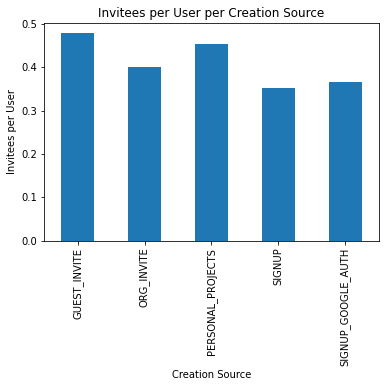

In [114]:
ax=(users.groupby(by=['creation_source']).invitees.sum()/users.groupby(by=['creation_source']).size()).plot.bar()
ax.set_xlabel('Creation Source')
ax.set_ylabel('Invitees per User')
ax.set_title('Invitees per User per Creation Source');

Users who were invited to an organization as a guest invited the largest number of other users. Users who signed up via the website invited the least amount of other users.

In [115]:
users.org_id.isna().any()

False

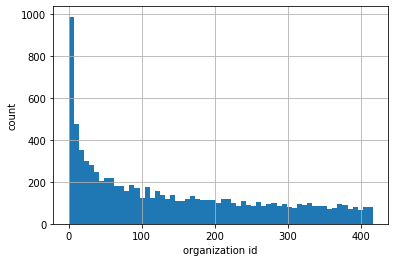

In [116]:
ax=users.org_id.hist(bins=60)
ax.set_xlabel('organization id')
ax.set_ylabel('count')
plt.show()

In [117]:
users.org_id.value_counts()

0      228
1      172
2      150
3      125
4      122
      ... 
400      6
396      6
397      5
386      4
416      2
Name: org_id, Length: 417, dtype: int64

In [118]:
users.org_id.isna().any()

False

In [ ]:
users.org_id.

In [186]:
users['creation_sources']=users.creation_source.map({'ORG_INVITE':0, 'GUEST_INVITE':1, 'PERSONAL_PROJECTS':2, 'SIGNUP':3, 'SIGNUP_GOOGLE_AUTH':4.})

In [237]:
total=users.groupby('invitees')['org_id'].sum()

In [ ]:
users[users.]

In [ ]:
users.groupby('org_id')

In [242]:
pd.qcut(users.org_id, q=4).unique()

[(-0.001, 30.0], (30.0, 109.0], (109.0, 239.0], (239.0, 416.0]]
Categories (4, interval[float64, right]): [(-0.001, 30.0] < (30.0, 109.0] < (109.0, 239.0] < (239.0, 416.0]]

In [243]:
users['org_groups']=pd.qcut(users.org_id, q=4, labels=[0,1,2,3])

In [270]:
users.adopted.value_counts()

0    7365
1    1445
Name: adopted, dtype: int64

In [280]:
total=users.groupby('org_groups').invitees.sum().reset_index()

In [295]:
users.groupby('org_groups').invitees.sum()

org_groups
0    862
1    931
2    910
3    848
Name: invitees, dtype: int64

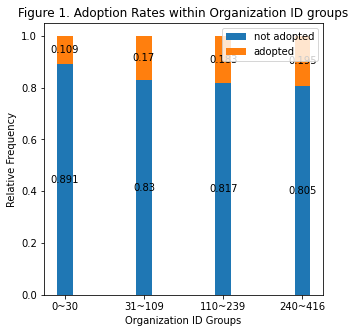

In [398]:
categories=sorted(users['org_groups'].unique())
adopted=[]
not_adopted=[]
for c in categories:
    c_con=users.org_groups==c
    n=len(users[c_con])
    adopted.append(len(users[(users.adopted==1.)&(c_con)])/n)
    not_adopted.append(len(users[(users.adopted==0.)&(c_con)])/n)
adopted=np.array(adopted)
not_adopted=np.array(not_adopted)

width=0.2
fig, ax = plt.subplots(1,1, figsize=(5,5))
bar1=ax.bar(categories, not_adopted, label='not adopted', width=width)
bar2=ax.bar(categories, adopted, label='adopted', bottom=not_adopted, width=width)
ax.set_ylabel('Relative Frequency')
ax.set_xlabel('Organization ID Groups')
ax.set_title('Figure 1. Adoption Rates within Organization ID groups')
ax.legend(fontsize=10)
ax.bar_label(bar1, labels=np.round(not_adopted, 3), label_type='center')
ax.bar_label(bar2, labels=np.round(adopted, 3), label_type='center')
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['0~30', '31~109', '110~239', '240~416'])
plt.show()
    

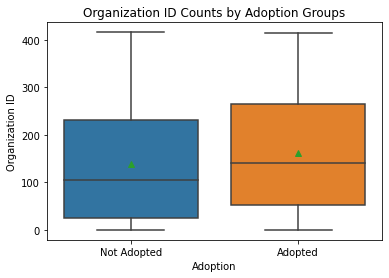

In [339]:
ax2=sns.boxplot(x='adopted', y='org_id', data=users, showmeans=True)
ax2.set_xlabel('Adoption')
ax2.set_ylabel('Organization ID')
ax2.set_title('Organization ID Counts by Adoption Groups')
ax2.set_xticks([0,1])
ax2.set_xticklabels(['Not Adopted', 'Adopted'])
plt.show()

In [350]:
users.invitees.value_counts()

0     7180
1      761
2      376
3      218
4      119
5       74
6       49
7       23
8        8
10       1
9        1
Name: invitees, dtype: int64

In [351]:
users['invited_someone']=users.invitees!=0

In [352]:
users.invited_someone.value_counts()

False    7180
True     1630
Name: invited_someone, dtype: int64

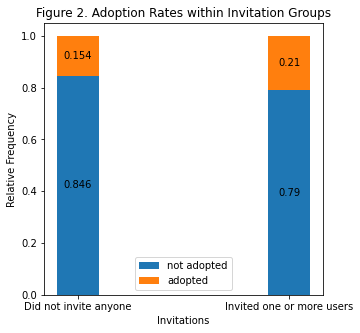

In [399]:
categories=sorted(users['invited_someone'].unique())
adopted=[]
not_adopted=[]
for c in categories:
    c_con=users.invited_someone==c
    n=len(users[c_con])
    adopted.append(len(users[(users.adopted==1.)&(c_con)])/n)
    not_adopted.append(len(users[(users.adopted==0.)&(c_con)])/n)
adopted=np.array(adopted)
not_adopted=np.array(not_adopted)

width=0.2
fig, ax = plt.subplots(1,1, figsize=(5,5))
bar1=ax.bar(categories, not_adopted, label='not adopted', width=width)
bar2=ax.bar(categories, adopted, label='adopted', bottom=not_adopted, width=width)
ax.set_ylabel('Relative Frequency')
ax.set_xlabel('Invitations')
ax.set_title('Figure 2. Adoption Rates within Invitation Groups')
ax.legend(fontsize=10)
ax.bar_label(bar1, labels=np.round(not_adopted, 3), label_type='center')
ax.bar_label(bar2, labels=np.round(adopted, 3), label_type='center')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Did not invite anyone', 'Invited one or more users'])
plt.show()
    

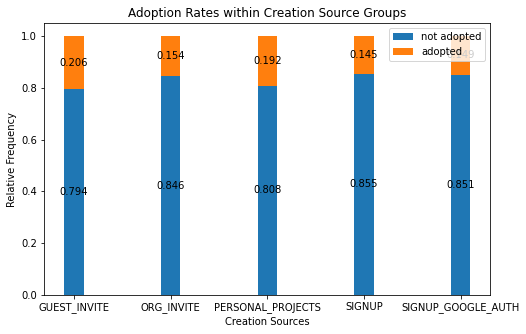

In [361]:
categories=sorted(users['creation_source'].unique())
adopted=[]
not_adopted=[]
for c in categories:
    c_con=users.creation_source==c
    n=len(users[c_con])
    adopted.append(len(users[(users.adopted==1.)&(c_con)])/n)
    not_adopted.append(len(users[(users.adopted==0.)&(c_con)])/n)
adopted=np.array(adopted)
not_adopted=np.array(not_adopted)

width=0.2
fig, ax = plt.subplots(1,1, figsize=(8,5))
bar1=ax.bar(categories, not_adopted, label='not adopted', width=width)
bar2=ax.bar(categories, adopted, label='adopted', bottom=not_adopted, width=width)
ax.set_ylabel('Relative Frequency')
ax.set_xlabel('Creation Sources')
ax.set_title('Adoption Rates within Creation Source Groups')
ax.legend(fontsize=10)
ax.bar_label(bar1, labels=np.round(not_adopted, 3), label_type='center')
ax.bar_label(bar2, labels=np.round(adopted, 3), label_type='center')

plt.show()
    

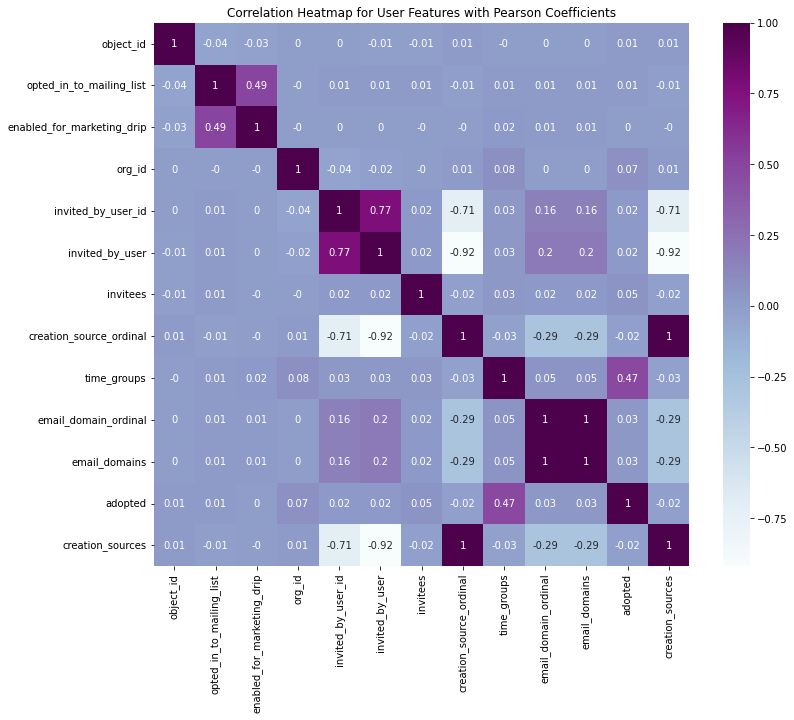

In [244]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(round(users.corr(), 2), annot=True, cmap='BuPu')
ax.set_title('Correlation Heatmap for User Features with Pearson Coefficients');

We should exclude 'invited_by_user_id' and 'invited_by_user' while including 'creation_sources'. 'Invitees' doesn't seem to be correlated to 'creation_source'.

In [125]:
from scipy.stats import chi2_contingency

In [126]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [127]:
users.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'usage_time', 'invited_by_user', 'invitees', 'creation_source_ordinal'],
      dtype='object')

In [138]:
users.usage_time.describe()

count                           8810
mean      59 days 07:11:10.964812713
std      144 days 06:19:26.708544454
min                  0 days 00:00:00
25%                  0 days 00:00:00
50%                  1 days 00:00:00
75%                 20 days 00:00:00
max                729 days 00:00:00
Name: usage_time, dtype: object

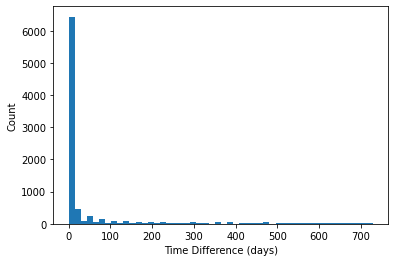

In [397]:
plt.hist(users.usage_time.dt.days, bins=50)
plt.xlabel('Time Difference (days)')
plt.ylabel('Count')
plt.show()

In [137]:
pd.qcut(users.usage_time, q=2).unique()

[(-1 days +23:59:59.999999999, 1 days 00:00:00], (1 days 00:00:00, 729 days 00:00:00]]
Categories (2, interval[timedelta64[ns], right]): [(-1 days +23:59:59.999999999, 1 days 00:00:00] < (1 days 00:00:00, 729 days 00:00:00]]

In [ ]:
users['time_groups']=pd.qcut(users.usage_time, q=2, labels=[0.,1.]).astype(float)

In [143]:
users['email_domain']=users.email.apply(lambda x: x[x.index('@')+1:])

In [153]:
users.email_domain.value_counts()[:7]

gmail.com         2923
yahoo.com         1722
jourrapide.com     882
gustr.com          841
cuvox.de           828
hotmail.com        803
luque.com            2
Name: email_domain, dtype: int64

In [145]:
domains=users.email_domain.value_counts().index.tolist()

In [146]:
domains

['gmail.com',
 'yahoo.com',
 'jourrapide.com',
 'gustr.com',
 'cuvox.de',
 'hotmail.com',
 'luque.com',
 'mumdc.com',
 'oqpze.com',
 'xybhi.com',
 'xvnbr.com',
 'tgaim.com',
 'yhnuj.com',
 'upqhn.com',
 'mngrr.com',
 'gctmd.com',
 'ceqro.com',
 'vkjsm.com',
 'kbaxq.com',
 'eqtvz.com',
 'jyspz.com',
 'dshis.com',
 'hfbri.com',
 'eznoh.com',
 'nqnui.com',
 'fboqn.com',
 'syspy.com',
 'bfxyd.com',
 'flnib.com',
 'ckvbo.com',
 'rwkhi.com',
 'qvjim.com',
 'bchfd.com',
 'orsoq.com',
 'sleif.com',
 'mndbu.com',
 'hwqov.com',
 'cylik.com',
 'eryuz.com',
 'dseth.com',
 'uasor.com',
 'lyjyt.com',
 'cyqff.com',
 'qqgix.com',
 'adpql.com',
 'fulwb.com',
 'pafbm.com',
 'khhlm.com',
 'tweeh.com',
 'tdife.com',
 'tqyvi.com',
 'tfsce.com',
 'ggkhf.com',
 'oodxe.com',
 'tgwte.com',
 'amknl.com',
 'xdutj.com',
 'gcrgb.com',
 'ufpll.com',
 'bfvoj.com',
 'igiwm.com',
 'xsxix.com',
 'pdwak.com',
 'xxsyq.com',
 'pivfo.com',
 'nwukn.com',
 'ihnru.com',
 'ktqxt.com',
 'ldguj.com',
 'ispta.com',
 'gobqd.com',


In [159]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder(categories=[domains])
enc.fit(users[['email_domain']])
users['email_domains']=enc.transform(users[['email_domain']])

In [160]:
users[['email_domain', 'email_domains']]

,email_domain,email_domains
0,yahoo.com,1.0
1,gustr.com,3.0
2,gustr.com,3.0
3,yahoo.com,1.0
4,yahoo.com,1.0
...,...,...
11995,gustr.com,3.0
11996,gmail.com,0.0
11997,cuvox.de,4.0
11998,iuxiw.com,811.0


In [161]:
users.email_domains.value_counts()

0.0      2923
1.0      1722
2.0       882
3.0       841
4.0       828
         ... 
807.0       1
808.0       1
809.0       1
810.0       1
811.0       1
Name: email_domains, Length: 812, dtype: int64

In [162]:
users.email_domains=users.email_domains.apply(lambda x: x if x<6. else (6. if x<14 else 7.))

In [163]:
users.email_domains.value_counts()

0.0    2923
1.0    1722
2.0     882
3.0     841
4.0     828
5.0     803
7.0     798
6.0      13
Name: email_domains, dtype: int64

0.: gmail
1.: yahoo
2.: jourrapide
3.: gustr
4.: cuvox
5.: hotmail
6.: email domains with user count=2
7.: email domains with user count=1

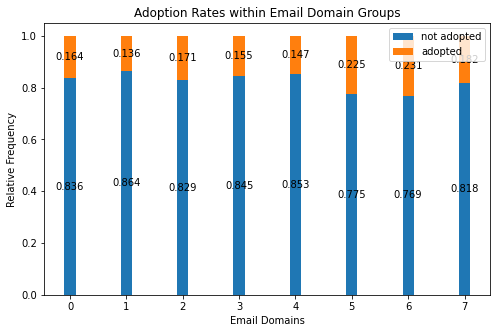

In [457]:
categories=sorted(users['email_domains'].unique())
adopted=[]
not_adopted=[]
for c in categories:
    c_con=users.email_domains==c
    n=len(users[c_con])
    adopted.append(len(users[(users.adopted==1.)&(c_con)])/n)
    not_adopted.append(len(users[(users.adopted==0.)&(c_con)])/n)
adopted=np.array(adopted)
not_adopted=np.array(not_adopted)

width=0.2
fig, ax = plt.subplots(1,1, figsize=(8,5))
bar1=ax.bar(categories, not_adopted, label='not adopted', width=width)
bar2=ax.bar(categories, adopted, label='adopted', bottom=not_adopted, width=width)
ax.set_ylabel('Relative Frequency')
ax.set_xlabel('Email Domains')
ax.set_title('Adoption Rates within Email Domain Groups')
ax.legend(fontsize=10)
ax.bar_label(bar1, labels=np.round(not_adopted, 3), label_type='center')
ax.bar_label(bar2, labels=np.round(adopted, 3), label_type='center')

plt.show()
    

In [247]:
rows=[]
cols=['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'time_groups', 'email_domains', 'org_groups']
for c1 in cols:
    col=[]
    for c2 in cols:
        cramers=cramers_v(users[c1], users[c2])
        col.append(round(cramers,2))
    rows.append(col)
    
cramersV_df=pd.DataFrame(np.array(rows), columns=cols, index=cols)

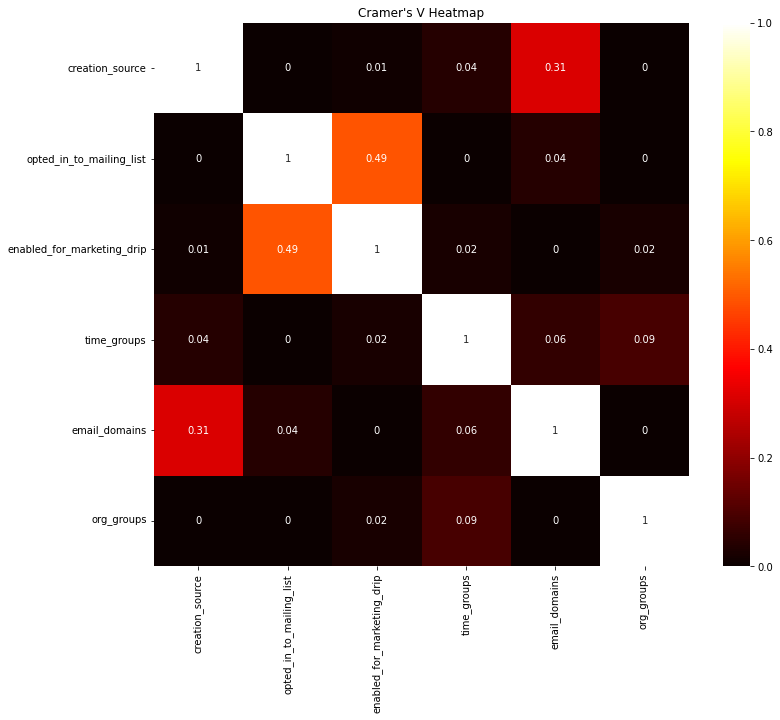

In [248]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(cramersV_df[cols], annot=True, cmap='hot')
ax.set_title("Cramer's V Heatmap");

In [167]:
engagement=pd.read_csv('takehome_user_engagement.csv')
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [168]:
engagement.visited.value_counts()

1    207917
Name: visited, dtype: int64

In [169]:
engagement.isna().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [170]:
engagement.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [171]:
engagement.time_stamp=engagement.time_stamp.astype('datetime64[ns]')
engagement.time_stamp.describe(datetime_is_numeric=True)

count                           207917
mean     2013-10-30 05:06:45.648763648
min                2012-05-31 08:20:06
25%                2013-07-16 20:17:21
50%                2013-12-03 06:38:34
75%                2014-03-13 08:00:24
max                2014-06-06 14:58:50
Name: time_stamp, dtype: object

The engagement dataset runs from May 31, 2012 to June 6, 2014. 

In [173]:
df=engagement.groupby('user_id').resample('1W', on='time_stamp').sum()
df.head()

user_id  visited
user_id time_stamp                  
1       2014-04-27        1        1
2       2013-11-17        2        1
        2013-11-24        0        0
        2013-12-01        2        1
        2013-12-08        0        0

In [174]:
df.visited.value_counts()

1    23131
0    13475
2    11817
3     9415
4     7348
7     6695
5     5756
6     4645
Name: visited, dtype: int64

In [176]:
df.index

Int64Index([    1,     2,     2,     2,     2,     2,     2,     2,     2,
                2,
            ...
            11991, 11991, 11991, 11992, 11995, 11996, 11997, 11998, 11999,
            12000],
           dtype='int64', name='user_id', length=82282)

In [175]:
df.index=df.index.droplevel(1)

In [177]:
df.index

Int64Index([    1,     2,     2,     2,     2,     2,     2,     2,     2,
                2,
            ...
            11991, 11991, 11991, 11992, 11995, 11996, 11997, 11998, 11999,
            12000],
           dtype='int64', name='user_id', length=82282)

adopted_map is a dict that will map the user id to 0 if the user logged in less than 3 times in a week and 1 if they are considered an adopted user.




In [180]:
adopted_map={}
for idx in df.index:
    if (df.visited[idx]>=3).any():
        adopted_map[idx]=1
    else:
        adopted_map[idx]=0
users['adopted']=users['object_id'].map(adopted_map)

In [181]:
users.adopted.isna().any()

False

In [182]:
users.adopted

0        0
1        1
2        0
3        0
4        0
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: adopted, Length: 8810, dtype: int64

In [183]:
users.adopted.value_counts()

0    7365
1    1445
Name: adopted, dtype: int64

In [187]:
users.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'usage_time', 'invited_by_user', 'invitees', 'creation_source_ordinal',
       'time_groups', 'email_domain', 'email_domain_ordinal', 'email_domains',
       'adopted', 'creation_sources'],
      dtype='object')

In [185]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, precision_recall_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay 

Features to consider are creation_sources, opted_in_to_mailing_list, enabled_for_marketing_drip, email_domains, org_id, and invitees, but 'opted_in_to_mailing_list' and 'enabled_for_marketing_drip' are features with very low 

In [211]:
cols=['creation_sources', 'org_id', 'invitees', 'email_domains', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip']
X=users[cols]
y=users[['adopted']].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=16)

In [212]:
rf=RandomForestClassifier(random_state=16)
param_grid={'n_estimators':[10, 50, 100, 300, 500, 700, 1000],
            'criterion':['gini', 'entropy'],
            'max_features':['sqrt', 'log2'],
            'max_depth':[None, 1, 3, 5, 7, 15, 30]}
rf_cv=GridSearchCV(rf, param_grid, scoring='roc_auc', cv=10)
rf_cv.fit(X_train, y_train)
print("Tuned Random Forest Parameter: {}".format(rf_cv.best_params_))
print("Tuned Random Forest Score: {}".format(rf_cv.best_score_))

Tuned Random Forest Parameter: {'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 10}
Tuned Random Forest Score: 0.5830942097528977


In [213]:
clf=RandomForestClassifier(criterion='gini', max_depth=1, max_features='sqrt', n_estimators=10, random_state=16)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
y_pred_prob=clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds=roc_curve(y_test, y_pred_prob)

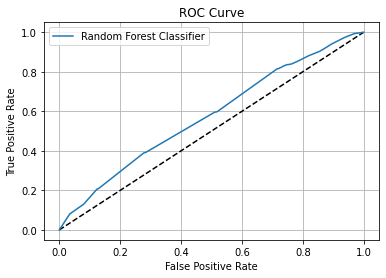

In [214]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Random Forest Classifier') 
plt.grid()
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.title('ROC Curve') 
plt.legend()
plt.show()

In [215]:
import shap
explainer=shap.TreeExplainer(clf)
shap_values=explainer.shap_values(X_test)

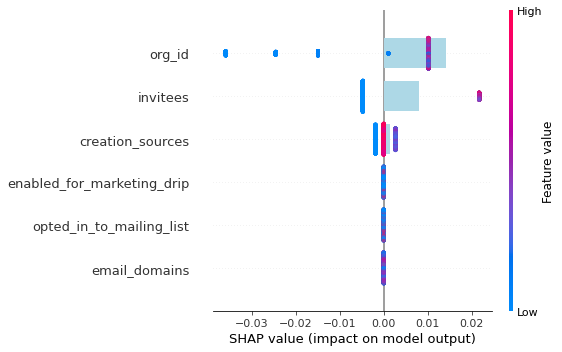

In [222]:
plt.figure(figsize=(8,5))
shap.summary_plot(shap_values[1], X_test, plot_type='bar', color='lightblue', plot_size=None, show=False)
shap.summary_plot(shap_values[1], X_test, plot_size=None, show=False, alpha=0.5)

plt.show()

In [364]:
cols=['creation_sources', 'org_groups', 'invitees', 'email_domains']
X=users[cols]
y=users[['adopted']].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=16)

In [365]:
rf=RandomForestClassifier(random_state=16)
param_grid={'n_estimators':[10, 50, 100, 300, 500, 700, 1000],
            'criterion':['gini', 'entropy'],
            'max_features':['sqrt', 'log2'],
            'max_depth':[None, 1, 3, 5, 7, 15, 30]}
rf_cv=GridSearchCV(rf, param_grid, scoring='roc_auc', cv=10)
rf_cv.fit(X_train, y_train)
print("Tuned Random Forest Parameter: {}".format(rf_cv.best_params_))
print("Tuned Random Forest Score: {}".format(rf_cv.best_score_))

Tuned Random Forest Parameter: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 10}
Tuned Random Forest Score: 0.584796596918595


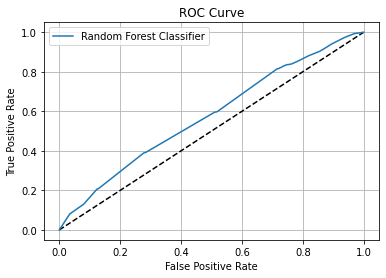

In [367]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Random Forest Classifier') 
plt.grid()
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.title('ROC Curve') 
plt.legend()
plt.show()

In [368]:
import shap
explainer=shap.TreeExplainer(clf)
shap_values=explainer.shap_values(X_test)

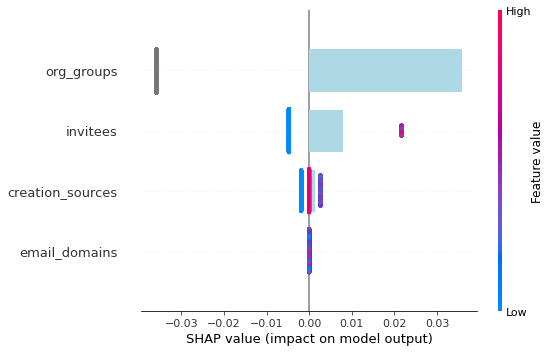

In [369]:

plt.figure(figsize=(8,5))
shap.summary_plot(shap_values[1], X_test, plot_type='bar', color='lightblue', plot_size=None, show=False)
shap.summary_plot(shap_values[1], X_test, plot_size=None, show=False, alpha=0.5)
plt.show()

In [400]:
from sklearn.linear_model import LogisticRegression

In [401]:
clf=LogisticRegression(random_state=16)
param_grid={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
logreg_cv=GridSearchCV(clf, param_grid, scoring='roc_auc', cv=10)
logreg_cv.fit(X_train, y_train)
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Score: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 10}
Tuned Logistic Regression Score: 0.5653651558321113


In [404]:
from xgboost import XGBClassifier

In [407]:
cols=['creation_sources', 'org_id', 'invitees', 'email_domains']
X=users[cols]
y=users[['adopted']].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=16)

In [408]:
param_grid={'n_estimators':[10, 50, 100, 300, 500],
            'max_depth':[1, 3, 15, None],
           'colsample_bytree':[0.1, 0.3, 0.5, 0.7, 1]}
clf=XGBClassifier(random_state=16, use_label_encoder=False, eval_metric='logloss')
xgb_cv=GridSearchCV(clf, param_grid, cv=10, scoring='roc_auc', n_jobs=-1)
xgb_cv.fit(X_train, y_train)
print("Tuned XGB Classifier Parameter: {}".format(xgb_cv.best_params_))
print("Tuned XGB Classifier Score: {}".format(xgb_cv.best_score_))

Tuned XGB Classifier Parameter: {'colsample_bytree': 0.1, 'max_depth': 1, 'n_estimators': 300}
Tuned XGB Classifier Score: 0.5836809719939973


In [410]:
users.adopted.value_counts()

0    7365
1    1445
Name: adopted, dtype: int64

In [411]:
from random import sample
sampledf=pd.concat([users[users.adopted==0].sample(1445), users[users.adopted==1]], ignore_index=True)

In [413]:
sampledf.shape

(2890, 22)

In [427]:
cols=['creation_sources', 'org_id', 'invitees', 'email_domains']
X=sampledf[cols]
y=sampledf[['adopted']].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=16)

In [416]:
from sklearn.preprocessing import MinMaxScaler

In [428]:
scaler=MinMaxScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [422]:
param_grid={'n_estimators':[10, 50, 100, 300, 500],
            'max_depth':[1, 3, 15, None],
           'colsample_bytree':[0.1, 0.3, 0.5, 0.7, 1]}
clf=XGBClassifier(random_state=16, use_label_encoder=False, eval_metric='logloss')
xgb_cv=GridSearchCV(clf, param_grid, cv=10, scoring='roc_auc', n_jobs=-1)
xgb_cv.fit(X_train_scaled, y_train)
print("Tuned XGB Classifier Parameter: {}".format(xgb_cv.best_params_))
print("Tuned XGB Classifier Score: {}".format(xgb_cv.best_score_))

Tuned XGB Classifier Parameter: {'colsample_bytree': 0.1, 'max_depth': 1, 'n_estimators': 10}
Tuned XGB Classifier Score: 0.5819059963216641


In [423]:
rf=RandomForestClassifier(random_state=16)
param_grid={'n_estimators':[10, 50, 100, 300, 500, 700, 1000],
            'criterion':['gini', 'entropy'],
            'max_features':['sqrt', 'log2'],
            'max_depth':[None, 1, 3, 5, 7, 15, 30]}
rf_cv=GridSearchCV(rf, param_grid, scoring='roc_auc', cv=10)
rf_cv.fit(X_train_scaled, y_train)
print("Tuned Random Forest Parameter: {}".format(rf_cv.best_params_))
print("Tuned Random Forest Score: {}".format(rf_cv.best_score_))

Tuned Random Forest Parameter: {'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 100}
Tuned Random Forest Score: 0.5855025473532893


In [429]:
clf=RandomForestClassifier(criterion='gini', max_depth=1, max_features='sqrt', n_estimators=100, random_state=16)
clf.fit(X_train_scaled, y_train)
y_pred=clf.predict(X_test_scaled)
y_pred_prob=clf.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds=roc_curve(y_test, y_pred_prob)

In [433]:
X_test.columns

Index(['creation_sources', 'org_id', 'invitees', 'email_domains'], dtype='object')

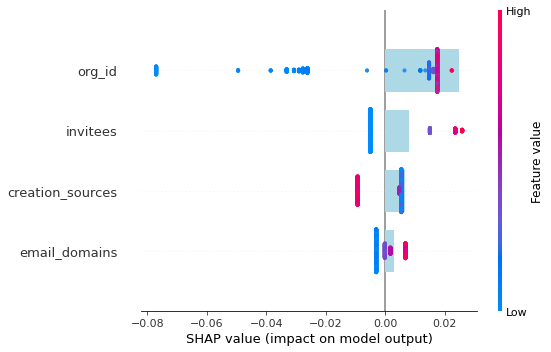

In [436]:
import shap
explainer=shap.TreeExplainer(clf)
shap_values=explainer.shap_values(X_test_scaled)
plt.figure(figsize=(8,5))
shap.summary_plot(shap_values[1], X_test_scaled, feature_names=X_test.columns, plot_type='bar', color='lightblue', plot_size=None, show=False)
shap.summary_plot(shap_values[1], X_test_scaled, feature_names=X_test.columns, plot_size=None, show=False, alpha=0.5)
plt.show()

Users belonging to smaller organization groups (higher org_id) within the database are more likely to be adopted users. Users who invited more people were more likely to be adopted.

In [444]:
sampledf.groupby('adopted')[['creation_source', 'creation_sources']].value_counts()

adopted  creation_source     creation_sources
0        ORG_INVITE          0.0                 516
         SIGNUP              3.0                 323
         SIGNUP_GOOGLE_AUTH  4.0                 249
         GUEST_INVITE        1.0                 240
         PERSONAL_PROJECTS   2.0                 117
1        ORG_INVITE          0.0                 491
         GUEST_INVITE        1.0                 326
         SIGNUP              3.0                 275
         SIGNUP_GOOGLE_AUTH  4.0                 206
         PERSONAL_PROJECTS   2.0                 147
dtype: int64

In [449]:
sampledf.groupby('creation_source').adopted.value_counts(normalize=True)

creation_source     adopted
GUEST_INVITE        1          0.575972
                    0          0.424028
ORG_INVITE          0          0.512413
                    1          0.487587
PERSONAL_PROJECTS   1          0.556818
                    0          0.443182
SIGNUP              0          0.540134
                    1          0.459866
SIGNUP_GOOGLE_AUTH  0          0.547253
                    1          0.452747
Name: adopted, dtype: float64

In [441]:
users.groupby('adopted')[['creation_source', 'creation_sources']].value_counts()

adopted  creation_source     creation_sources
0        ORG_INVITE          0.0                 2694
         SIGNUP              3.0                 1619
         GUEST_INVITE        1.0                 1260
         SIGNUP_GOOGLE_AUTH  4.0                 1175
         PERSONAL_PROJECTS   2.0                  617
1        ORG_INVITE          0.0                  491
         GUEST_INVITE        1.0                  326
         SIGNUP              3.0                  275
         SIGNUP_GOOGLE_AUTH  4.0                  206
         PERSONAL_PROJECTS   2.0                  147
dtype: int64

In [454]:
users.email_domains.value_counts(normalize=True)

0.0    0.331782
1.0    0.195460
2.0    0.100114
3.0    0.095460
4.0    0.093984
5.0    0.091146
7.0    0.090579
6.0    0.001476
Name: email_domains, dtype: float64